In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-food-dataset-with/Ifood_new.csv


# **Hello this is my new notebook on foods of india and I did analysis on that.....**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/indian-food-dataset-with/Ifood_new.csv')

In [4]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,img_url
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10,50,sweet,dessert,West Bengal,East,https://www.crazymasalafood.com/wp-content/ima...
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
3,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
4,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
 9   img_url         254 non-null    object
dtypes: int64(2), object(8)
memory usage: 20.0+ KB


In [6]:
df.corr()

,prep_time,cook_time
prep_time,1.000000,0.144113
cook_time,0.144113,1.000000


In [7]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [8]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region', 'img_url'],
      dtype='object')

## **Removing *img_url* column***

In [9]:
df.drop(columns = ['img_url'], inplace = True)

In [10]:
df.head(3)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10,50,sweet,dessert,West Bengal,East
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North


## **All columns unique value since its the categorical data so we have understand data carefull**

In [11]:
print(df['diet'].unique())
print(df['flavor_profile'].unique())
print(df['course'].unique())
print(df['state'].unique())
print(df['region'].unique())

['vegetarian' 'non vegetarian']
['sweet' 'spicy' 'bitter' '-1' 'sour']
['dessert' 'main course' 'snack' 'starter']
['West Bengal' 'Punjab' 'Assam' 'Maharashtra' 'Andhra Pradesh' 'Kerala'
 'Gujarat' 'Goa' 'Telangana' 'Karnataka' 'Manipur' 'Rajasthan' '-1'
 'NCT of Delhi' 'Odisha' 'Tamil Nadu' 'Jammu & Kashmir' 'Chhattisgarh'
 'Nagaland' 'Uttar Pradesh' 'Haryana' 'Madhya Pradesh' 'Bihar' 'Tripura'
 'Uttarakhand']
['East' 'North' 'North East' 'West' 'South' '-1' 'Central' nan]


# **Univariate Analysis**

## **Showing plot of diet which include which are vegetarian and non-vegetarian**

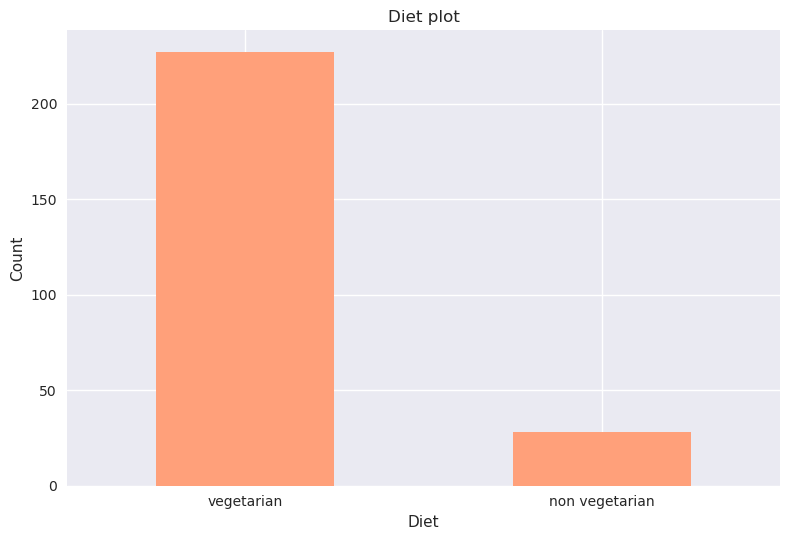

In [12]:
plt.style.use('seaborn')
df['diet'].value_counts().plot(kind = 'bar', color = 'lightsalmon')

plt.xticks(rotation = 0)
plt.title('Diet plot')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.tight_layout()

## **Similarly we doing with the *flavor_profile***

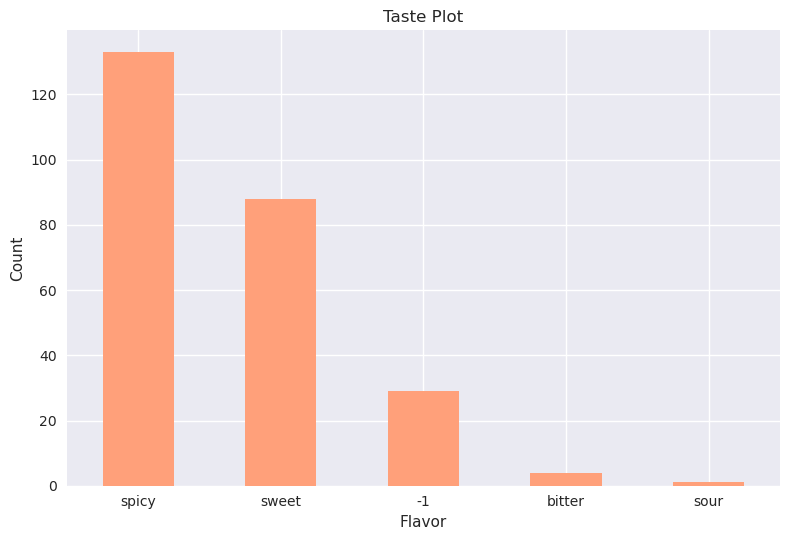

In [13]:
df['flavor_profile'].value_counts().plot(kind = 'bar', color = 'lightsalmon')
plt.xticks(rotation = 0)
plt.title('Taste Plot')
plt.xlabel('Flavor')
plt.ylabel('Count')
plt.tight_layout()

## **Similarly we did with the *course* column**

Text(0, 0.5, 'Count')

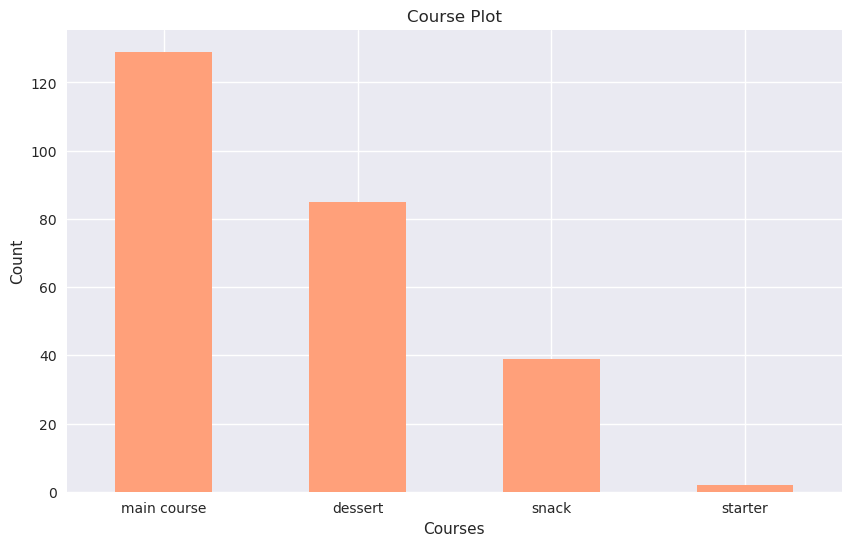

In [14]:
df['course'].value_counts().plot(kind = 'bar', color = 'lightsalmon', figsize = (10,6))
plt.xticks(rotation = 0)
plt.title('Course Plot')
plt.xlabel('Courses')
plt.ylabel('Count')

## **Then we plot the *state* column and the Gujrat has most of the dishes**

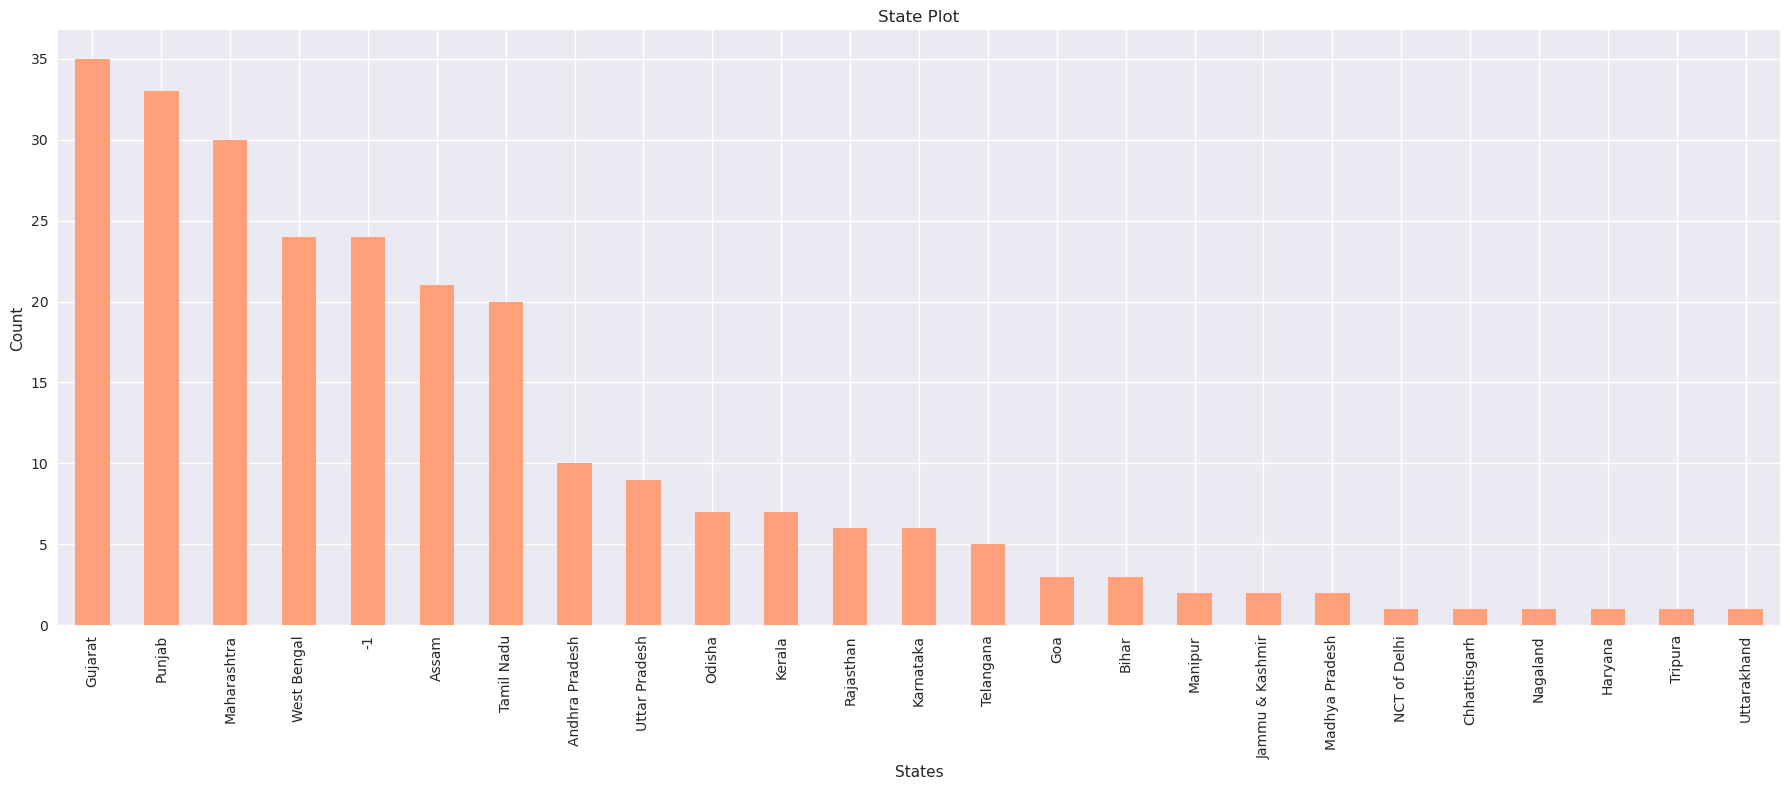

In [15]:
df['state'].value_counts().plot(kind = 'bar', color = 'lightsalmon', figsize = (18,8))
plt.title('State Plot')
plt.xlabel('States')
plt.ylabel('Count')
plt.tight_layout()

## **Similarly we do with the *region* column**

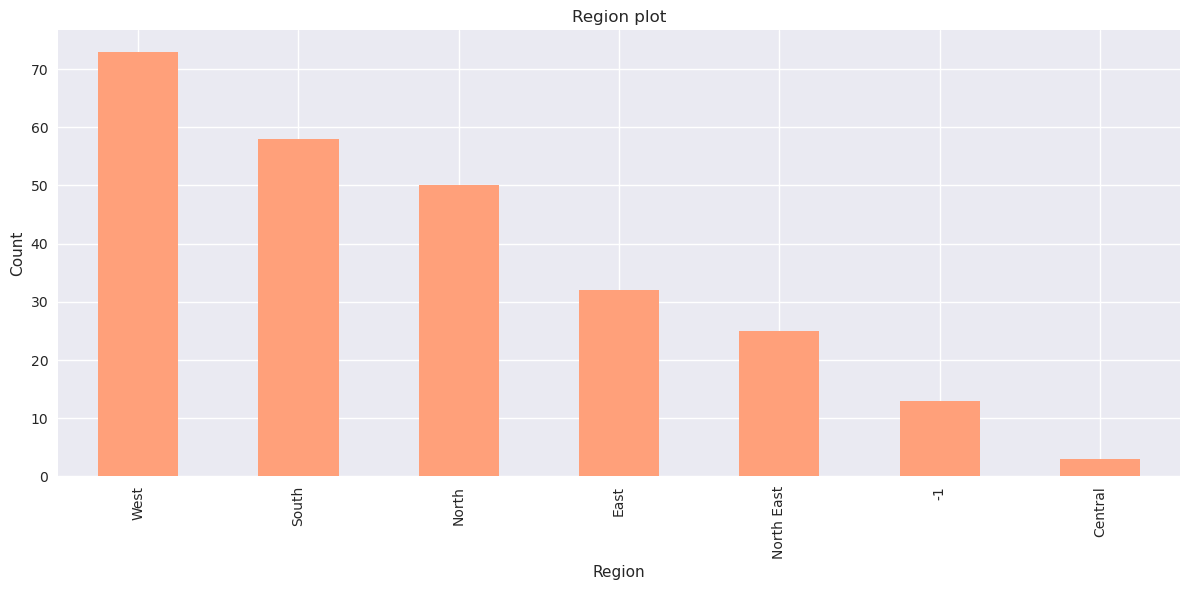

In [16]:
df['region'].value_counts().plot(kind = 'bar', color = 'lightsalmon', figsize = (12,6))
plt.title('Region plot')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()

# **Feature Engeneering**

## **We get new column called *total_column* we use it for seeing which dishes are time consuming**

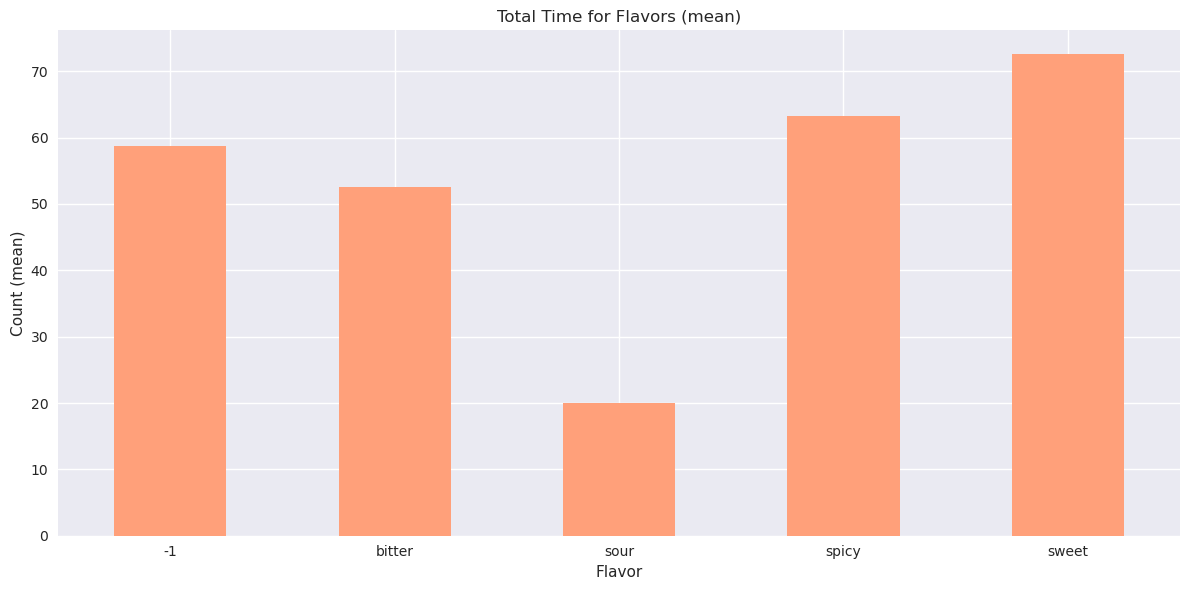

In [17]:
df['total_time'] = df['prep_time'] + df['cook_time']

total_time_for_flavor = df.groupby('flavor_profile')['total_time'].mean()
total_time_for_flavor.plot(kind = 'bar', color = 'lightsalmon', figsize = (12,6))

plt.xticks(rotation = 0)
plt.title('Total Time for Flavors (mean)')
plt.xlabel('Flavor')
plt.ylabel('Count (mean)')
plt.tight_layout()

## **Similarly we are doing with *course* column**

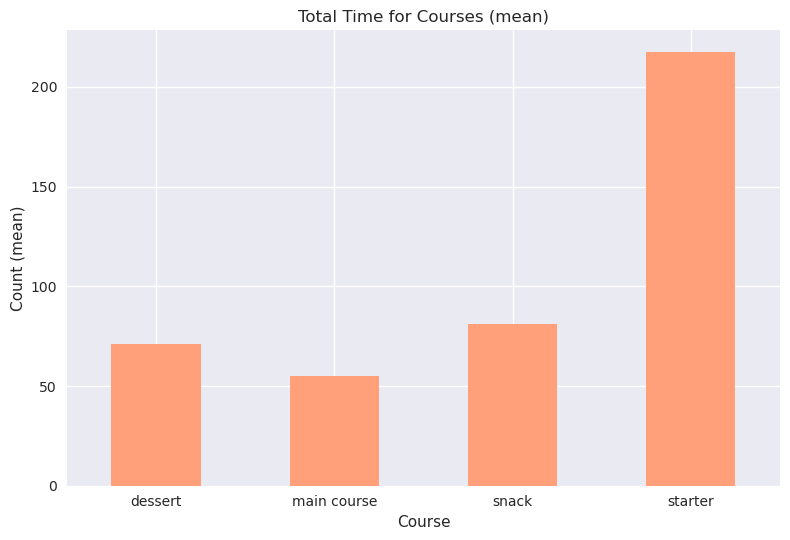

In [18]:
total_time_for_course = df.groupby('course')['total_time'].mean()
total_time_for_course.plot(kind = 'bar', color = 'lightsalmon')

plt.xticks(rotation = 0)
plt.title('Total Time for Courses (mean)')
plt.xlabel('Course')
plt.ylabel('Count (mean)')
plt.tight_layout()

## **We are doing with *state* column**

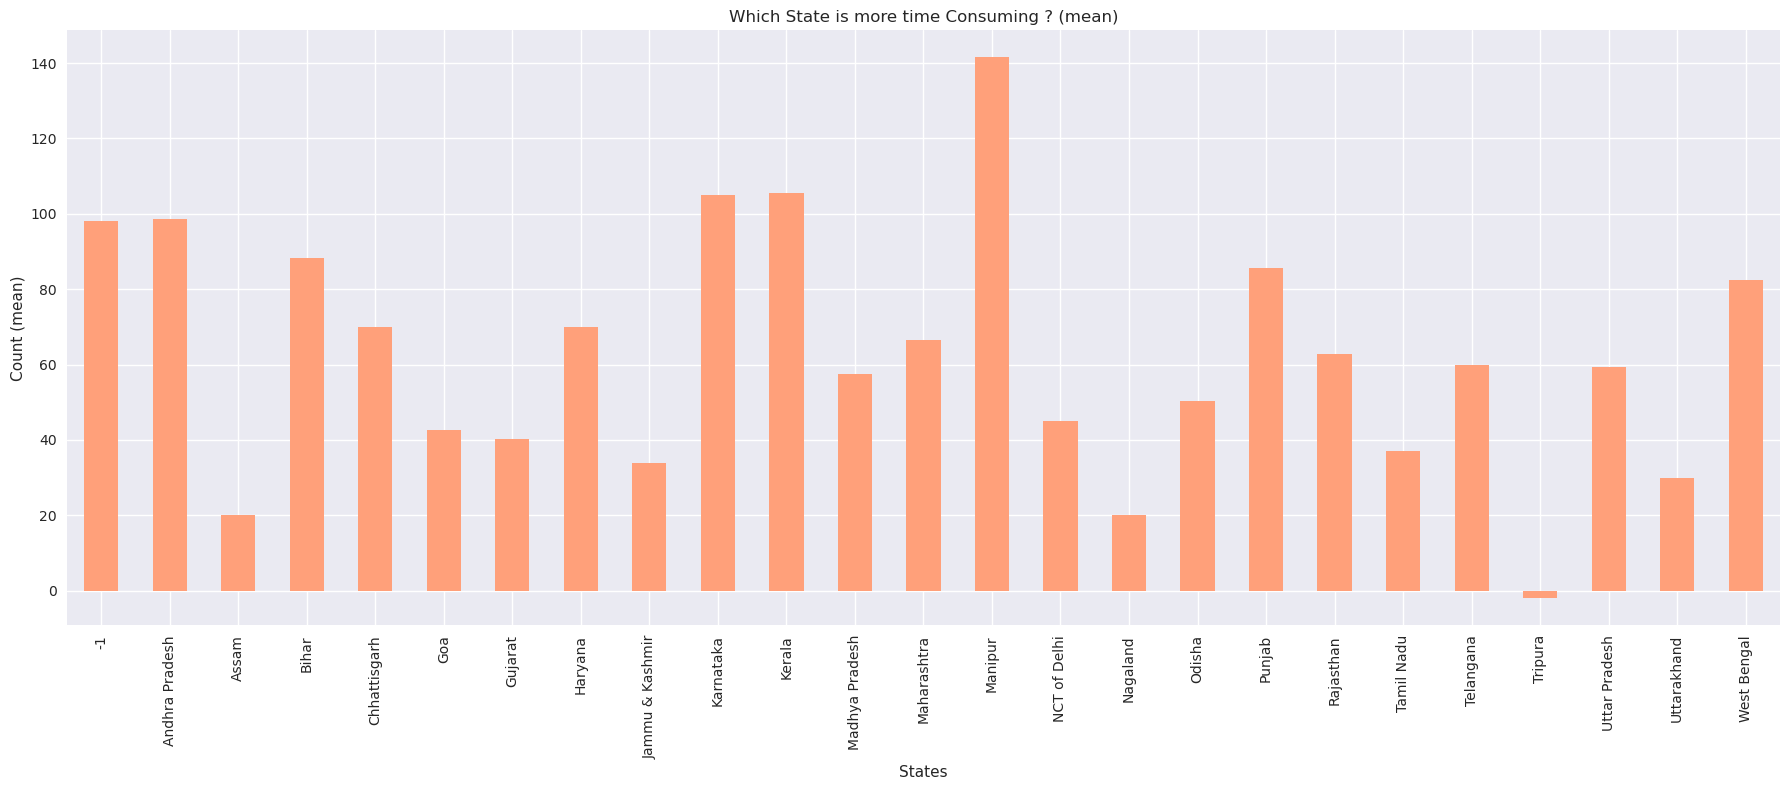

In [19]:
total_time_for_state = df.groupby('state')['total_time'].mean()
total_time_for_state.plot(kind = 'bar', color = 'lightsalmon', figsize = (18,8))

plt.title('Which State is more time Consuming ? (mean)')
plt.xlabel('States')
plt.ylabel('Count (mean)')
plt.tight_layout()

## **Similarly we are doing with *region* column**

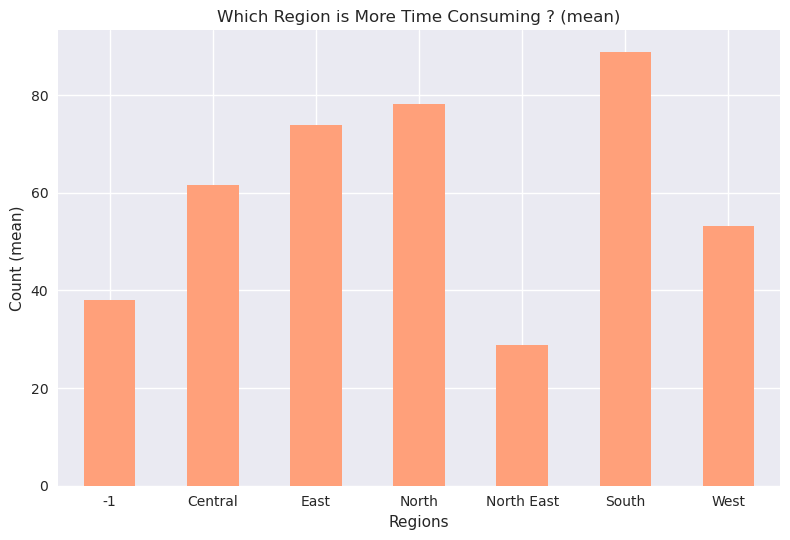

In [20]:
total_time_for_region = df.groupby('region')['total_time'].mean()
total_time_for_region.plot(kind = 'bar', color = 'lightsalmon')

plt.xticks(rotation = 0)
#darkseagreen, lightgreen, palegreen, 
plt.title('Which Region is More Time Consuming ? (mean)')
plt.xlabel('Regions')
plt.ylabel('Count (mean)')
plt.tight_layout()

# **Applying Reference Knowledge**

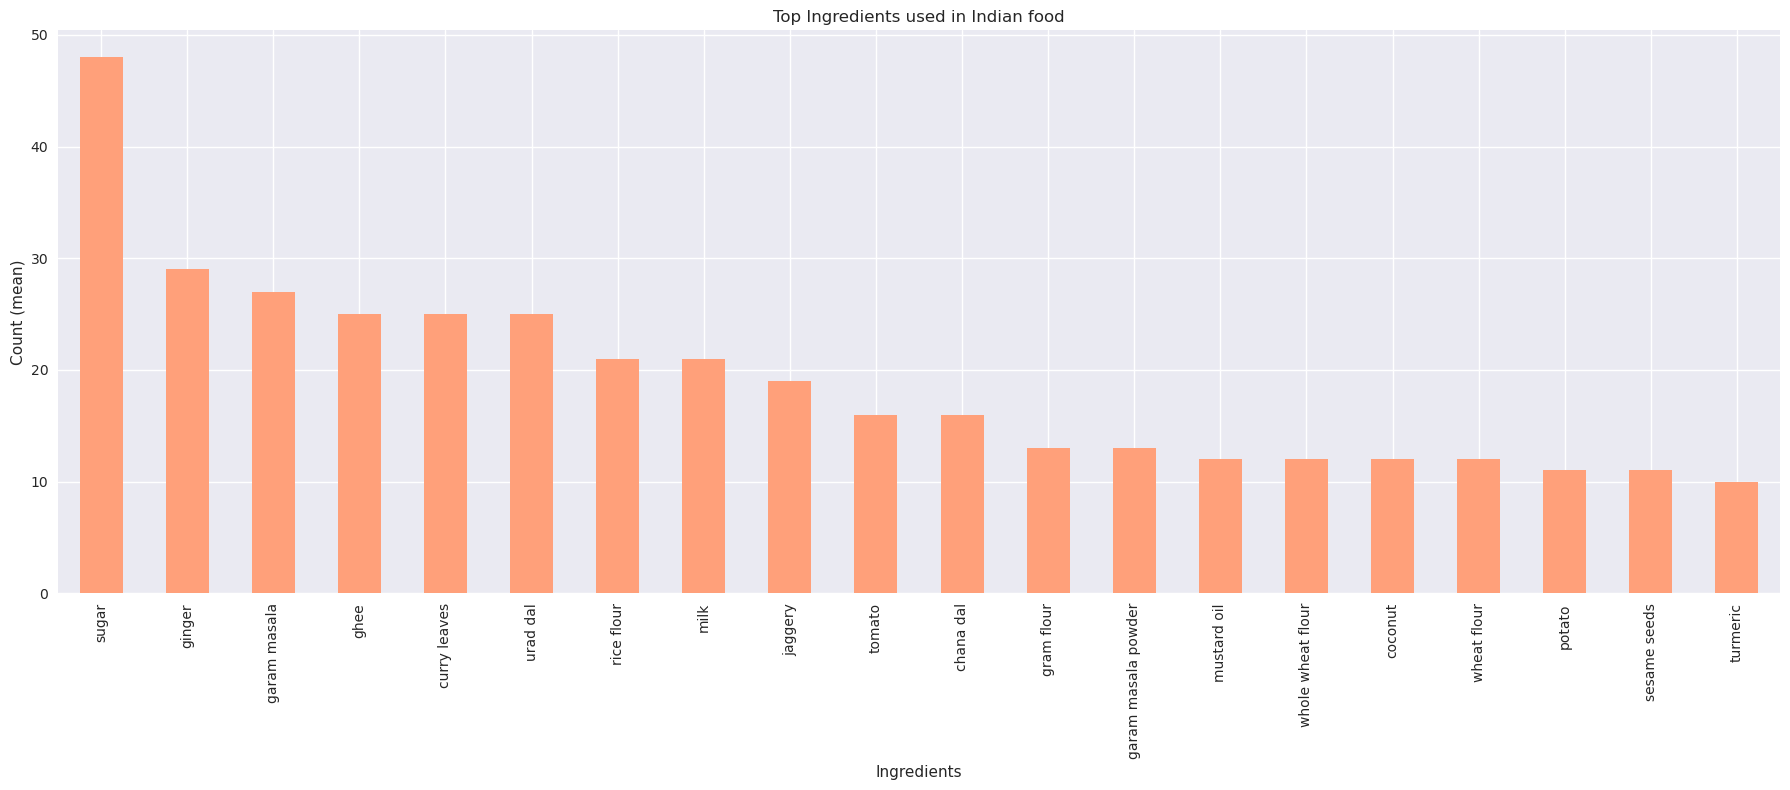

In [21]:
from collections import Counter
# Splitting column ingredient
total_ingredients = df['ingredients'].str.lower().str.split(', ').sum()

count_ingredients = Counter(total_ingredients)

plt.figure(figsize=(14, 8))
top_ingredients = pd.DataFrame(count_ingredients.most_common(20), columns = ['Ingredients', 'Count'])
top_ingredients.set_index('Ingredients')['Count'].sort_values(ascending = False).plot(kind = 'bar', color = 'lightsalmon', figsize = (18,8))

plt.title('Top Ingredients used in Indian food')
plt.xlabel('Ingredients')
plt.ylabel('Count (mean)')
plt.tight_layout()

## **In below we count in which regions which courses are more populated**

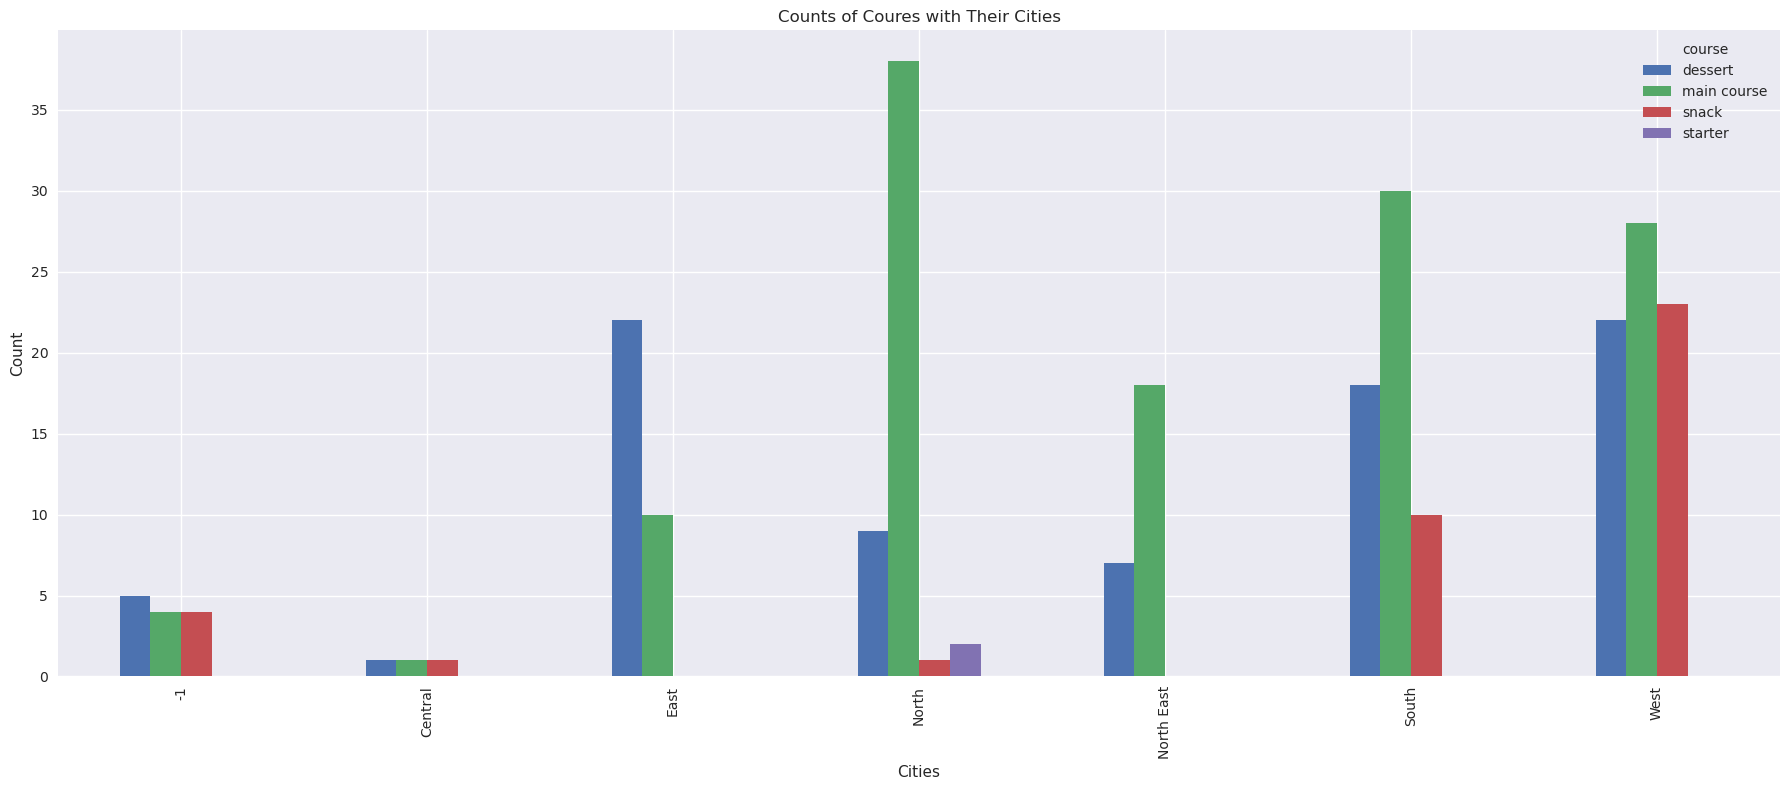

In [22]:
region_courses_count = df.groupby(['region', 'course']).size().unstack().fillna(0)

region_courses_count.plot(kind = 'bar', figsize = (18,8))
plt.title('Counts of Coures with Their Cities')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.tight_layout()

In [23]:
df.head(3)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10,50,sweet,dessert,West Bengal,East,60
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North,30
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North,45


## **Similarly we count *region* and *flavor_profile* columns**

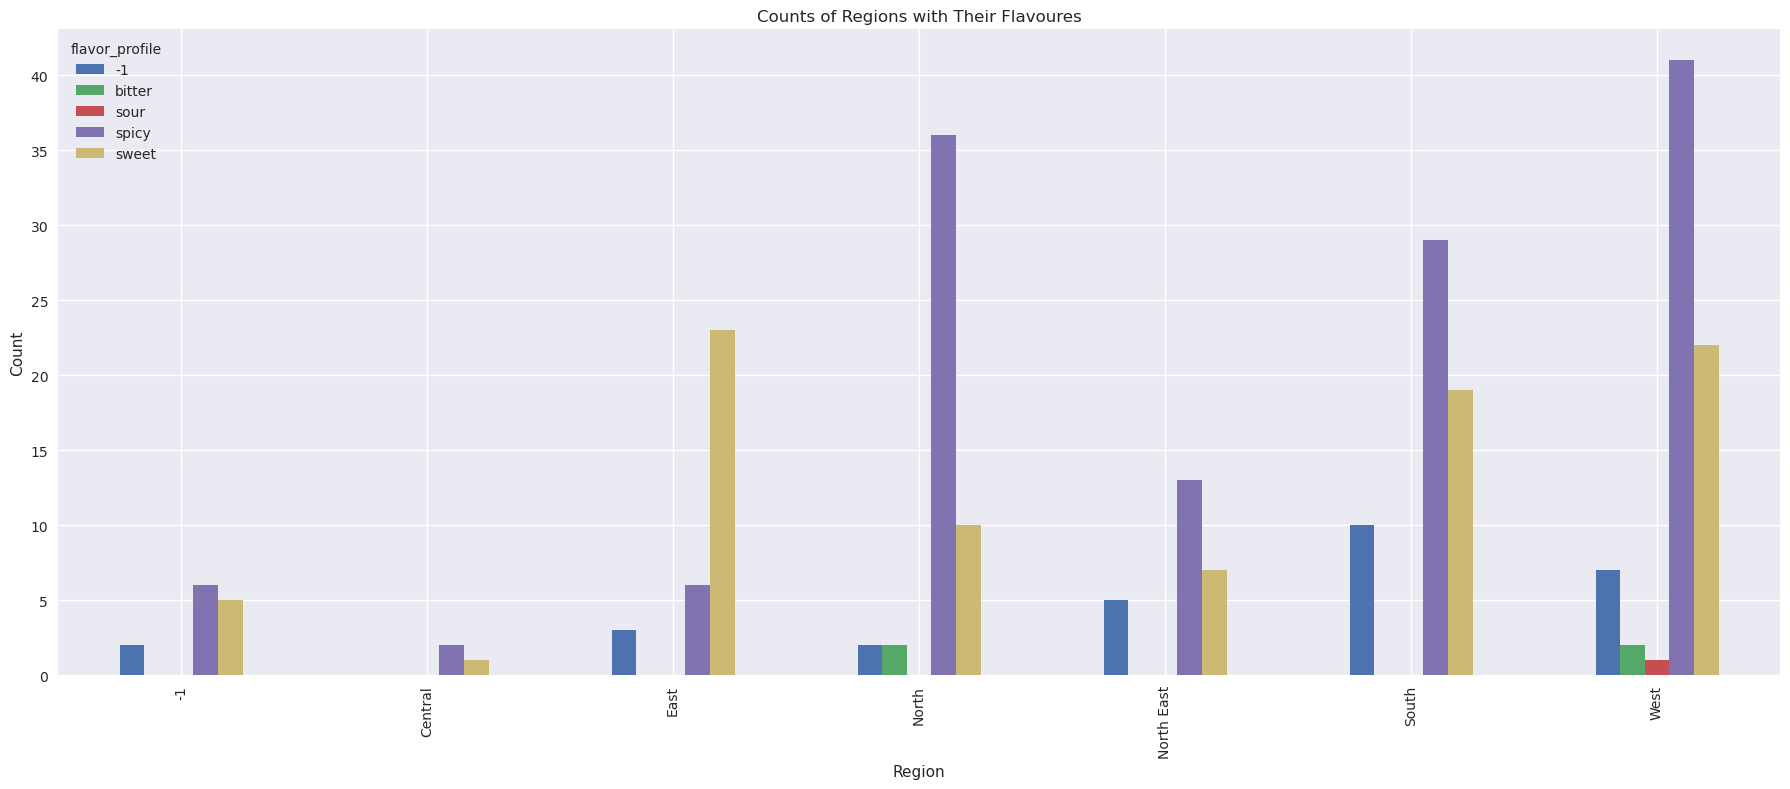

In [24]:
flavor_region_count = df.groupby(['region', 'flavor_profile']).size().unstack().fillna(0)

flavor_region_count.plot(kind = 'bar', figsize = (18,8))
plt.title('Counts of Regions with Their Flavoures')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.tight_layout()

## **Similarly we are doing with *state* and *diet* columns**

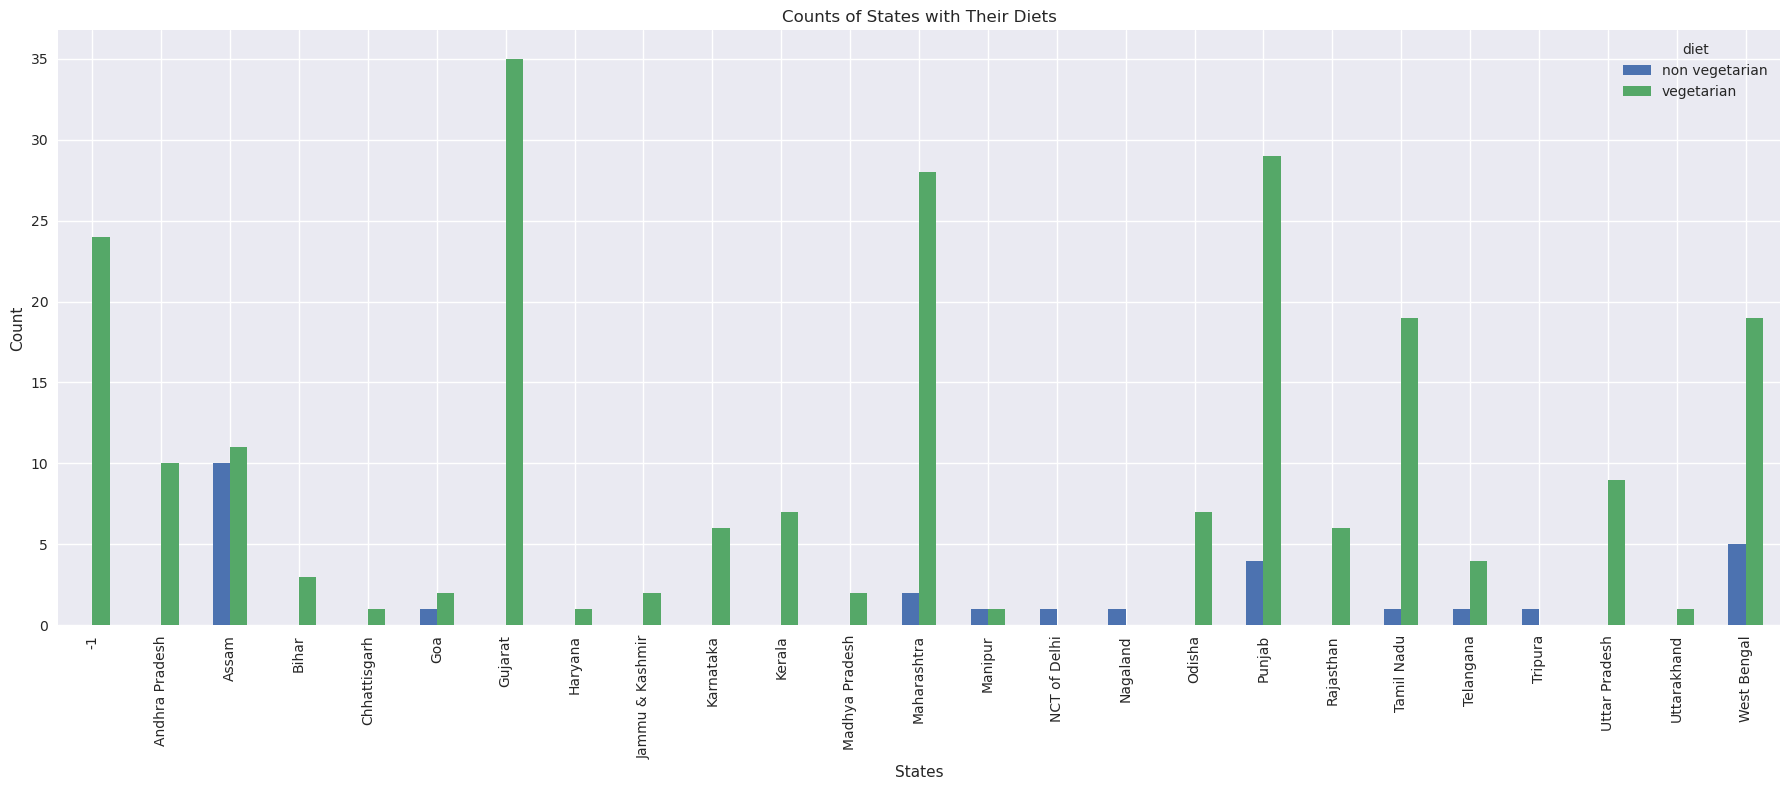

In [25]:
state_diet_count = df.groupby(['state', 'diet']).size().unstack().fillna(0)

state_diet_count.plot(kind = 'bar', figsize = (18,8))
plt.title('Counts of States with Their Diets')
plt.xlabel('States')
plt.ylabel('Count')
plt.tight_layout()

## **Another one with *Course* and *Diet* columns**

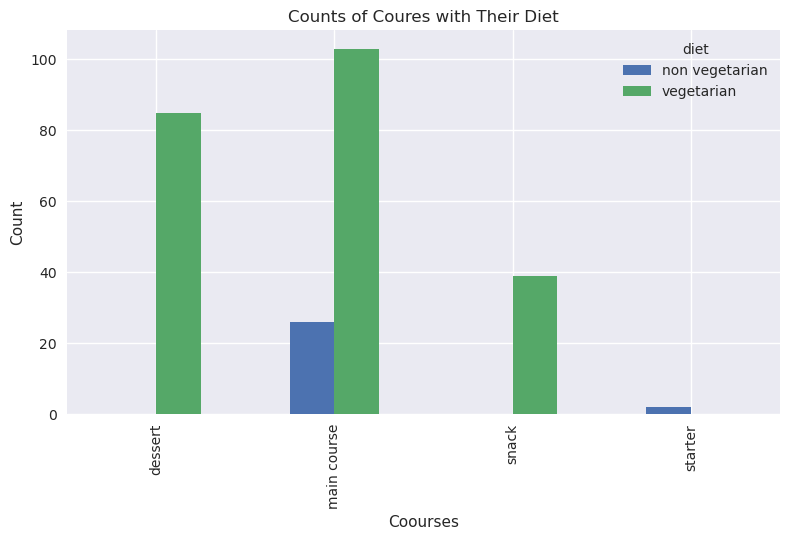

In [26]:
course_diet_count = df.groupby(['course', 'diet']).size().unstack().fillna(0)

course_diet_count.plot(kind = 'bar')
plt.title('Counts of Coures with Their Diet')
plt.xlabel('Coourses')
plt.ylabel('Count')
plt.tight_layout()

## **In this we calculate which product take most time to make**

In [27]:
complex_dishes = df[['name', 'prep_time', 'cook_time', 'total_time']].sort_values(by='total_time', ascending = False).head()
complex_dishes

,name,prep_time,cook_time,total_time
229,Shrikhand,10,720,730
193,Pindi chana,500,120,620
204,Puttu,495,40,535
156,Misti doi,480,30,510
148,Masala Dosa,360,90,450
